### 유방암 데이터 셋을 활용하여 유방암 예측 모델

In [329]:
%cd /content/drive/MyDrive/딥러닝

/content/drive/MyDrive/딥러닝


In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer  # 유방암 데이터셋

In [331]:
# 데이터 로드
breast_data = load_breast_cancer()
breast_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [332]:
breast_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [333]:
# x, y 분리
X = breast_data['data']
y = breast_data['target']
X.shape, y.shape


((569, 30), (569,))

In [334]:
pd.Series(y).value_counts()
# 1 양성
# 0 음성

,count
1,357
0,212


In [335]:
# train / test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.3,
    random_state= 30,
    stratify= y  # 분류시에만 적용
)

In [336]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [337]:
# 도구 불러오기
from tensorflow.keras.models import Sequential                 # 뼈대
from tensorflow.keras.layers import InputLayer, Dense, ReLU    # 딥러닝 층

In [338]:
# 1. 신경망 구조 설계

# 뼈대
model = Sequential()

# 입력층 - 입력모양을 정하는 역할
model.add(InputLayer(shape = (30,)))  # 데이터 개수 정의

# 중간층
# units
# activation
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# 출력층
model.add(Dense(1, activation='sigmoid'))

In [339]:
# 2. 학습방법 설정

# 2. 학습 방법 설정
# 출력층에 따라 달라짐!!
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
# 1. 오차 구하는 도구 => 손실함수 설정
# 2. 최적화 함수 설정
# 3. 평가 방식

# 회귀: mean_squared_error             ,  metrics = mse
# 이진: binary_crossentropy            ,  metrics = accuracy
# 다중: sparse_categorical_crossentropy,  metrics = accuracy

In [340]:
# model 학습
h = model.fit(X_train, y_train, epochs=500, validation_split= 0.2, verbose=1)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4887 - loss: 6.0110 - val_accuracy: 0.7250 - val_loss: 1.3570
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6920 - loss: 1.0633 - val_accuracy: 0.9125 - val_loss: 0.1831
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8376 - loss: 0.3981 - val_accuracy: 0.9125 - val_loss: 0.1907
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8613 - loss: 0.4516 - val_accuracy: 0.9750 - val_loss: 0.1020
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8932 - loss: 0.2669 - val_accuracy: 0.9750 - val_loss: 0.0873
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8594 - loss: 0.4043 - val_accuracy: 0.9750 - val_loss: 0.0869
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8678 - loss: 0.3538 - val_accuracy: 0.9125 - val_loss: 0.1502
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8838 - loss: 0.3229 - val_accuracy: 0.

In [341]:
# 4. 평가
model.evaluate(X_test, y_test)  # sklearn의 score의 그것과 같다

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7312 - loss: 0.4358


[0.4438900947570801, 0.7368420958518982]

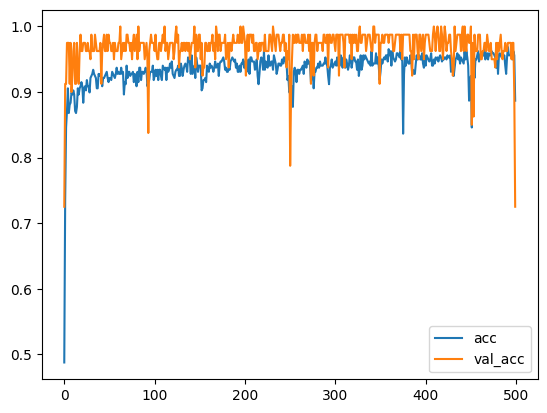

In [342]:
# 학습 결과 시각화
plt.plot(h.history['accuracy'], label = "acc")
plt.plot(h.history['val_accuracy'], label = "val_acc")

plt.legend()  # 범례 표시

plt.show()